In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# data = pd.read_csv(".csv")
# data.head()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iot-dataset/device_4_dataset.csv')

In [7]:
data.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,type
0,1.000000,60.0,0.000000e+00,1.000000,60.0,0.0,1.000000,60.0,0.0,1.000000,...,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.00000,0.0,0.0,benign
1,1.000000,60.0,0.000000e+00,1.000000,60.0,0.0,1.000000,60.0,0.0,1.000000,...,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.00000,0.0,0.0,benign
2,1.000000,342.0,0.000000e+00,1.000000,342.0,0.0,1.000000,342.0,0.0,1.000000,...,0.0,0.0,6.249414,449.603272,122.911136,449.603272,15107.14730,0.0,0.0,benign
3,1.963325,342.0,4.370000e-11,1.977831,342.0,0.0,1.992555,342.0,0.0,1.999253,...,0.0,0.0,7.248947,434.759286,120.000074,434.759286,14400.01777,0.0,0.0,benign
4,1.000000,60.0,0.000000e+00,1.000000,60.0,0.0,1.000000,60.0,0.0,1.000000,...,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.00000,0.0,0.0,benign


In [8]:
data.groupby('type')['type'].count()

type
benign            175240
gafgyt_combo       58152
gafgyt_junk        28349
gafgyt_scan        27859
gafgyt_tcp         92581
gafgyt_udp        105782
mirai_ack          91123
mirai_scan        103621
mirai_syn         118128
mirai_udp         217034
mirai_udpplain     80808
Name: type, dtype: int64

In [11]:
# data.drop(data[data["type"] == "gafgyt_tcp"].index, inplace = True)
# data.drop(data[data["type"] == "gafgyt_udp"].index, inplace = True)
data.drop(data[data["type"] == "mirai_ack"].index, inplace = True)
data.drop(data[data["type"] == "mirai_scan"].index, inplace = True)
data.drop(data[data["type"] == "mirai_syn"].index, inplace = True)
data.drop(data[data["type"] == "mirai_udp"].index, inplace = True)
data.drop(data[data["type"] == "mirai_udpplain"].index, inplace = True)

In [10]:
data.groupby('type')['type'].count()

type
benign          175240
gafgyt_combo     58152
gafgyt_junk      28349
gafgyt_scan      27859
gafgyt_tcp       92581
gafgyt_udp      105782
Name: type, dtype: int64

In [12]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [13]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
x, y = rus.fit_resample(x, y)


In [14]:
from collections import Counter
print(sorted(Counter(y).items()))

[('benign', 27859), ('gafgyt_combo', 27859), ('gafgyt_junk', 27859), ('gafgyt_scan', 27859), ('gafgyt_tcp', 27859), ('gafgyt_udp', 27859)]


In [ ]:
#standardize numerical columns
# def standardize(df,col):
#     df[col]= (df[col]-df[col].mean())/df[col].std()
# data_st=data.copy()
# for i in (data_st.iloc[:,:-1].columns):
#     standardize (data_st,i)
# data_st.head()

In [15]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

In [16]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = sc.fit_transform(x)

In [17]:
x = x.reshape(x.shape[0], x.shape[1], 1)
print(x.shape)

(167154, 115, 1)


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,shuffle=True)

In [19]:
from keras import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D

model = Sequential()
model.add(Conv1D(64, 2, activation="relu", batch_input_shape=(None, 115, 1)))
model.add(Dense(16, activation="relu"))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(6, activation = 'softmax'))
model.compile(loss = 'sparse_categorical_crossentropy', 
     optimizer = "adam",               
              metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 114, 64)           192       
                                                                 
 dense (Dense)               (None, 114, 16)           1040      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 57, 16)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 912)               0         
                                                                 
 dense_1 (Dense)             (None, 6)                 5478      
                                                                 
Total params: 6,710
Trainable params: 6,710
Non-trainable params: 0
______________________________________________________

In [20]:
#Fitting the data to the training dataset
history = model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=10)

Epoch 1/10
4179/4179 [==============================] - 23s 5ms/step - loss: 0.4070 - accuracy: 0.7557 - val_loss: 0.3453 - val_accuracy: 0.8010
Epoch 2/10
4179/4179 [==============================] - 22s 5ms/step - loss: 0.3040 - accuracy: 0.8119 - val_loss: 0.2835 - val_accuracy: 0.8226
Epoch 3/10
4179/4179 [==============================] - 23s 5ms/step - loss: 0.2703 - accuracy: 0.8247 - val_loss: 0.2591 - val_accuracy: 0.8289
Epoch 4/10
4179/4179 [==============================] - 23s 6ms/step - loss: 0.2596 - accuracy: 0.8262 - val_loss: 0.2778 - val_accuracy: 0.8097
Epoch 5/10
4179/4179 [==============================] - 23s 6ms/step - loss: 0.2541 - accuracy: 0.8282 - val_loss: 0.2525 - val_accuracy: 0.8243
Epoch 6/10
4179/4179 [==============================] - 23s 5ms/step - loss: 0.2504 - accuracy: 0.8278 - val_loss: 0.2461 - val_accuracy: 0.8251
Epoch 7/10
4179/4179 [==============================] - 23s 6ms/step - loss: 0.2479 - accuracy: 0.8287 - val_loss: 0.2411 - val_ac

In [21]:
y_pred=model.predict(X_test)
y_pred = y_pred.argmax(axis=-1)

# **ploting and results**

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, matthews_corrcoef, f1_score, precision_score, recall_score

print(f"Accuracy   : {accuracy_score(y_test, y_pred)}")
# print(f"Precision  : {precision_score(y_test, y_pred)}")
# print(f"F1-Measure : {f1_score(y_test, y_pred)}")
print(f"MCC        : {matthews_corrcoef(y_test, y_pred)}")
# print(f"Recall     : {recall_score(y_test, y_pred)}")

Accuracy   : 0.8285722832101942
MCC        : 0.8232670913228721


In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5624
           1       1.00      0.99      0.99      5570
           2       0.99      1.00      0.99      5534
           3       1.00      1.00      1.00      5572
           4       0.49      1.00      0.66      5468
           5       1.00      0.00      0.00      5663

    accuracy                           0.83     33431
   macro avg       0.91      0.83      0.77     33431
weighted avg       0.91      0.83      0.77     33431



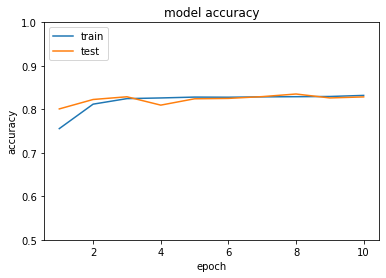

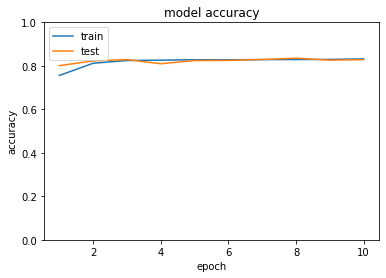

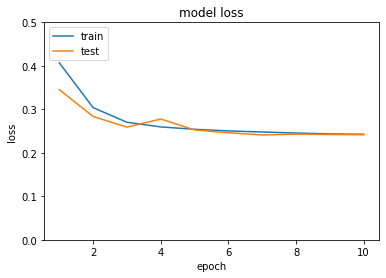

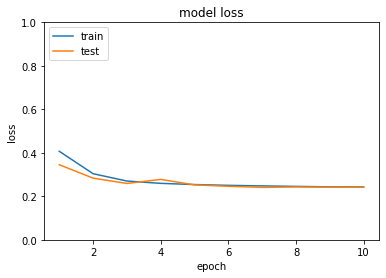

In [24]:
#Accuracy

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1,len(acc) + 1)
plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc , label='Validation accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim([0.5, 1])
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc , label='Validation accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim([0, 1])
plt.legend(['train', 'test'], loc='upper left')
plt.show()




#Loss

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss) + 1)
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss , label='Validation loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim([0, 0.5])
plt.legend(['train', 'test'], loc='upper left')
plt.show()


plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss , label='Validation loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim([0, 1])
plt.legend(['train', 'test'], loc='upper left')
plt.show()

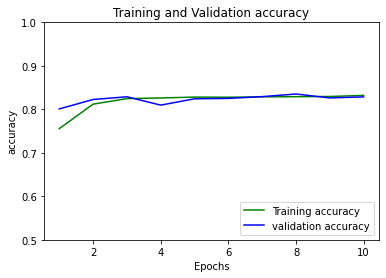

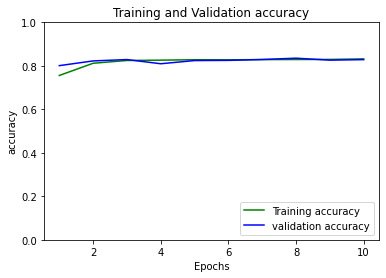

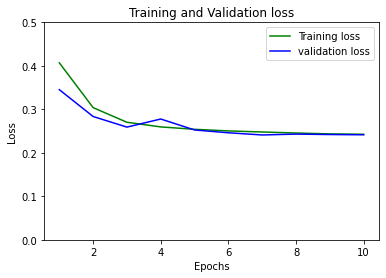

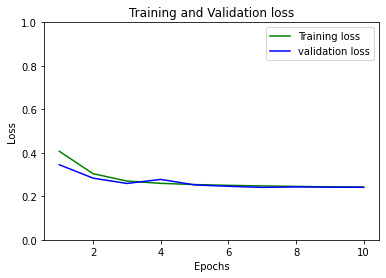

In [25]:
# Accuracy
acc = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(1,len(acc) + 1)
plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()


plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


#loss
loss = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,len(acc) + 1)
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0, 0.5])
plt.legend(loc='upper right')
plt.show()



plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='upper right')
plt.show()

[[5623    0    0    1    0    0]
 [   1 5507   61    1    0    0]
 [   0    2 5532    0    0    0]
 [   2    0    0 5570    0    0]
 [   1    1    0    0 5466    0]
 [   3    0    0    0 5658    2]]


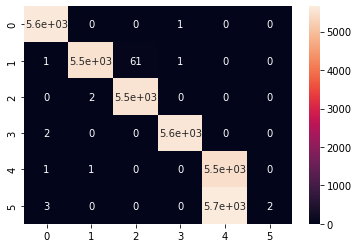

In [26]:
#Confusion matrix 
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True)